#  Исследование текущиго уровня потребительской лояльности NPS (Net Promoter Score)телеком компании. 

# Описание данных

*Таблица user*

Содержит основную информацию о клиентах.


user_id	Идентификатор клиента, первичный ключ таблицы

lt_day	Количество дней «жизни» клиента

age	Возраст клиента в годах

gender_segment	Пол клиента (1 – женщина, 0 – мужчина)

os_name	Тип операционной системы

cpe_type_name	Тип устройства

location_id	Идентификатор домашнего региона клиента, внешний ключ, отсылающий к таблице location

age_gr_id	Идентификатор возрастного сегмента клиента, внешний ключ, отсылающий к таблице age_segment

tr_gr_id	Идентификатор сегмента клиента по объёму потребляемого трафика в месяц, внешний ключ, отсылающий к таблице 
traffic_segment

lt_gr_id	Идентификатор сегмента клиента по количеству месяцев «жизни», внешний ключ, отсылающий к таблице lifetime_segment

nps_score	Оценка клиента в NPS-опросе (от 1 до 10)

*Таблица location*

Справочник территорий, в которых телеком-компания оказывает услуги.


location_id	Идентификатор записи, первичный ключ


country	Страна

city	Город

*Таблица age_segment*

Данные о возрастных сегментах клиентов.

age_gr_id	Идентификатор сегмента, первичный ключ

bucket_min	Минимальная граница сегмента

bucket_max	Максимальная граница сегмента

title	Название сегмента

*Таблица traffic_segment*

Данные о выделяемых сегментах по объёму потребляемого трафика.

tr_gr_id	Идентификатор сегмента, первичный ключ

bucket_min	Минимальная граница сегмента

bucket_max	Максимальная граница сегмента

title	Название сегмента

*Таблица lifetime_segment*

Данные о выделяемых сегментах по количеству месяцев «жизни» клиента — лайфтайму.

lt_gr_id	Идентификатор сегмента, первичный ключ

bucket_min	Минимальная граница сегмента

bucket_max	Максимальная граница сегмента

title	Название сегмента


In [2]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

In [2]:
path_to_db = '/datasets/telecomm_csi.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

In [3]:
query = """
SELECT u.user_id ,
       u.lt_day,
       u.age,
       u.gender_segment,
       u.os_name,
       u.cpe_type_name,
       l. country,
       l.city,
       a_s. title AS age_segment,
       t_s.title AS traffic_segment,
       l_s.title AS lifetime_segment,
       u.nps_score,
       
CASE
    WHEN  lt_day <=365 
    THEN 'new '
    WHEN lt_day >365
THEN 'old'
END 
AS is_new,
CASE
    WHEN nps_score >= 9
    THEN 'promoters'
    WHEN nps_score>=7
    THEN 'passives'
    WHEN nps_score>0
    THEN 'detractors'
    END 
    AS nps_group

FROM  user AS u
LEFT OUTER JOIN location AS l ON u.location_id= l.location_id 
LEFT OUTER JOIN age_segment AS a_s ON  u.age_gr_id =a_s.age_gr_id
LEFT OUTER JOIN traffic_segment AS t_s ON u.tr_gr_id= t_s.tr_gr_id
LEFT OUTER JOIN lifetime_segment AS l_s ON u.lt_gr_id =l_s.lt_gr_id
;
"""

In [4]:
df = pd.read_sql(query, engine)
df.head(3)

,user_id,lt_day,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,is_new,nps_group
0,A001A2,2320,45.0,1.0,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,04 1-5,08 36+,10,old,promoters
1,A001WF,2344,53.0,0.0,ANDROID,SMARTPHONE,Россия,Киров,05 45-54,04 1-5,08 36+,10,old,promoters
2,A003Q7,467,57.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,06 55-64,08 20-25,06 13-24,10,old,promoters


In [5]:
df.to_csv('telecomm_csi_tableau.csv', index=False)

In [9]:
# Код ревьюера
query = """
SELECT substr(title, 4) AS age_segment
FROM age_segment
       """

pd.read_sql(query, engine)

,age_segment
0,до 16
1,16-24
2,25-34
3,35-44
4,45-54
5,55-64
6,66 +
7,n/a


### Укажите ссылку на дашборд на сайте Tableau Public:

https://public.tableau.com/views/telecom_csi_tableau/Dashboard3?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

 
                    

lifetime_segment                01 1      02 2      03 3    04 4-6   05 7-12  \
gender_segment age_segment                                                     
0.0            01 до 16          NaN  0.000000  0.357143  0.058824  0.000000   
               02 16-24          NaN  0.182390  0.211240  0.205832  0.186634   
               03 25-34     0.000000  0.285943  0.291468  0.274569  0.237321   
               04 35-44     0.333333  0.371588  0.400000  0.375661  0.368573   
               05 45-54     1.000000  0.536913  0.493590  0.417763  0.448566   
               06 55-64     1.000000  0.393548  0.540146  0.572482  0.469546   
               07 66 +           NaN  0.673913  0.696970  0.573913  0.544444   
               08 n/a       0.000000 -1.000000       NaN -0.500000 -1.000000   
1.0            01 до 16          NaN  0.500000  0.111111  0.222222  0.200000   
               02 16-24          NaN  0.245045  0.236111  0.271100  0.164977   
               03 25-34     1.000000  0.316308  0.359766  0.319668  0.291300   
               04 35-44     0.333333  0.450846  0.431775  0.449479  0.390759   
               05 45-54     1.000000  0.516770  0.584877  0.546698  0.484736   
               06 55-64          NaN  0.644828  0.555066  0.584660  0.583396   
               07 66 +           NaN  0.540000  0.531915  0.537143  0.640898   
               08 n/a       1.000000       NaN       NaN       NaN  1.000000   

lifetime_segment            06 13-24  07 25-36    08 36+  
gender_segment age_segment                                
0.0            01 до 16     0.041096 -0.092308 -0.286765  
               02 16-24     0.059398 -0.030520 -0.104258  
               03 25-34     0.153785  0.087561 -0.042019  
               04 35-44     0.308812  0.217884  0.100904  
               05 45-54     0.376032  0.311503  0.223342  
               06 55-64     0.427167  0.392430  0.334850  
               07 66 +      0.473451  0.387205  0.437282  
               08 n/a      -0.333333 -1.000000 -0.538462  
1.0            01 до 16     0.017857  0.076923 -0.106383  
               02 16-24     0.087361  0.019798 -0.065762  
               03 25-34     0.214059  0.145153  0.027744  
               04 35-44     0.332435  0.277917  0.175038  
               05 45-54     0.438341  0.360275  0.300104  
               06 55-64     0.518766  0.475520  0.417602  
               07 66 +      0.565394  0.559633  0.536269  
               08 n/a       0.500000 -0.333333 -0.285714

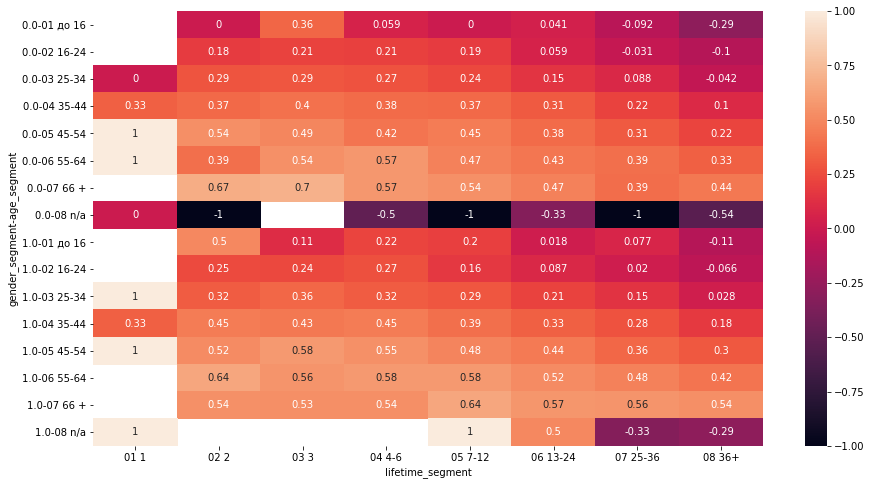

In [7]:
# Код ревьюера
import seaborn as sns
import matplotlib.pyplot as plt
d = df.assign(total_nps=lambda row: row['nps_group'].map({'promoters': 1, 'passives': 0, 'detractors': -1}))\
  .pivot_table(index=['gender_segment', 'age_segment'], columns=['lifetime_segment'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);

### Укажите ссылку на pdf-файл с презентацией:

https://1drv.ms/p/s!At5uE38o6zo9gkdxxgCThf-mgl-x?e=SKWaRc